In [1]:
# Import the Packages

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)
sns.set_theme(color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report , roc_auc_score

import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.simplefilter(action="ignore")

In [7]:
# Read the Data
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Datasets\\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 0


In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

        gender  Ratio
gender               
Male      3555  50.48
Female    3488  49.52
##########################################
               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901  83.79
1                       1142  16.21
##########################################
         Partner  Ratio
Partner                
No          3641  51.70
Yes         3402  48.30
##########################################
            Dependents  Ratio
Dependents                   
No                4933  70.04
Yes               2110  29.96
##########################################
              PhoneService  Ratio
PhoneService                     
Yes                   6361  90.32
No                     682   9.68
##########################################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390  48.13
Yes                        2971  42.18
No phone service            682   9.68
######

count   7043.00
mean      32.37
std       24.56
min        0.00
5%         1.00
10%        2.00
20%        6.00
30%       12.00
40%       20.00
50%       29.00
60%       40.00
70%       50.00
80%       60.00
90%       69.00
95%       72.00
99%       72.00
max       72.00
Name: tenure, dtype: float64


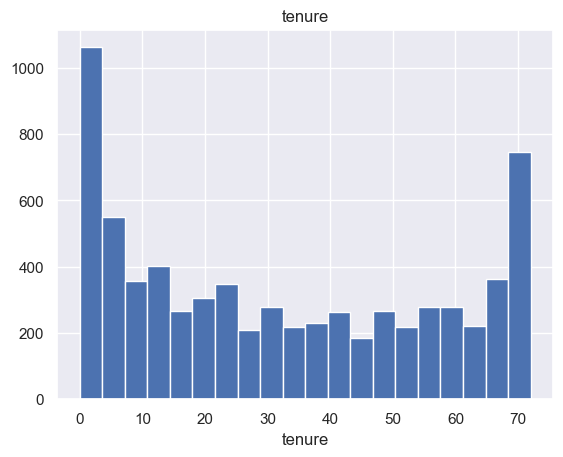

count   7043.00
mean      64.76
std       30.09
min       18.25
5%        19.65
10%       20.05
20%       25.05
30%       45.85
40%       58.83
50%       70.35
60%       79.10
70%       85.50
80%       94.25
90%      102.60
95%      107.40
99%      114.73
max      118.75
Name: MonthlyCharges, dtype: float64


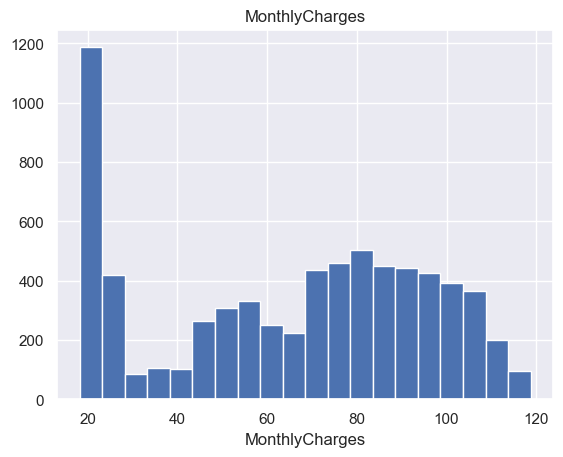

count   7032.00
mean    2283.30
std     2266.77
min       18.80
5%        49.60
10%       84.60
20%      267.07
30%      552.00
40%      944.17
50%     1397.47
60%     2048.95
70%     3141.13
80%     4475.41
90%     5976.64
95%     6923.59
99%     8039.88
max     8684.80
Name: TotalCharges, dtype: float64


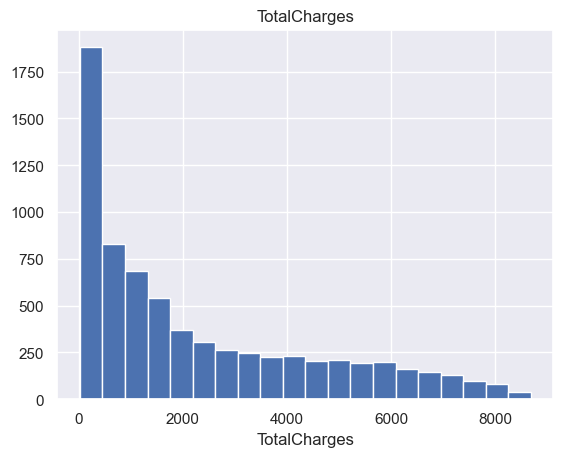

In [13]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [14]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
No      37.57
Yes     17.98


       MonthlyCharges
Churn                
No              61.27
Yes             74.44


       TotalCharges
Churn              
No          2555.34
Yes         1531.80




In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

cat_cols = [col for col in cat_cols if col not in "Churn"]
cat_but_car = [col for col in cat_but_car if col not in "customerID"]

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
cat_cols, num_cols, cat_but_car = grab_col_names(df)

for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    replace_with_thresholds(df, col)
df[num_cols].corr()

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 0
tenure False
MonthlyCharges False
TotalCharges False


,tenure,MonthlyCharges,TotalCharges
tenure,1.00,0.25,0.83
MonthlyCharges,0.25,1.00,0.65
TotalCharges,0.83,0.65,1.00


In [16]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.dropna(axis=0, inplace=True)

In [19]:
df.head()

df["Gender_SeniorCitizen"] = ""  
df.loc[(df["gender"] == "Female") & (df["SeniorCitizen"] == 1), "Gender_SeniorCitizen"] = "female_old"
df.loc[((df["gender"] == "Male") & (df["SeniorCitizen"] == 1)), "Gender_SeniorCitizen"] = "male_old"

column_name = 'tenure'
min_value = df[column_name].min()
max_value = df[column_name].max()
df['NEW_tenure'] = pd.cut(x=df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=["one_year", "two_year", "three_year", "four_year", "five_year","six_year"])
df['PaymentBilling'] = df['PaperlessBilling'] + '_' + df['PaymentMethod'] 
df['MonthlyToTotalRatio'] = df['MonthlyCharges'] / df['TotalCharges'] 
df['ContractRenewal'] = np.where(df['Contract'] != 'Month-to-month', 'Renewed', 'NotRenewed') 
df['AverageMonthlySpending'] = df['TotalCharges'] / df['tenure'] 

In [20]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols
for col in binary_cols:
    df = label_encoder(df, col)
df.head()


categorical_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)
df.head()


binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
for col in binary_cols:
    label_encoder(df, col)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MonthlyToTotalRatio,ContractRenewal,AverageMonthlySpending,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_SeniorCitizen_female_old,Gender_SeniorCitizen_male_old,NEW_tenure_two_year,NEW_tenure_three_year,NEW_tenure_four_year,NEW_tenure_five_year,NEW_tenure_six_year,PaymentBilling_No_Credit card (automatic),PaymentBilling_No_Electronic check,PaymentBilling_No_Mailed check,PaymentBilling_Yes_Bank transfer (automatic),PaymentBilling_Yes_Credit card (automatic),PaymentBilling_Yes_Electronic check,PaymentBilling_Yes_Mailed check
0,7590-VHVEG,0,0,1,0,1.00,0,1,29.85,29.85,0,1.00,0,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34.00,1,0,56.95,1889.50,0,0.03,1,55.57,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,0,2.00,1,1,53.85,108.15,1,0.50,0,54.08,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45.00,0,0,42.30,1840.75,0,0.02,1,40.91,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2.00,1,1,70.70,151.65,1,0.47,0,75.83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MonthlyToTotalRatio,ContractRenewal,AverageMonthlySpending,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_SeniorCitizen_female_old,Gender_SeniorCitizen_male_old,NEW_tenure_two_year,NEW_tenure_three_year,NEW_tenure_four_year,NEW_tenure_five_year,NEW_tenure_six_year,PaymentBilling_No_Credit card (automatic),PaymentBilling_No_Electronic check,PaymentBilling_No_Mailed check,PaymentBilling_Yes_Bank transfer (automatic),PaymentBilling_Yes_Credit card (automatic),PaymentBilling_Yes_Electronic check,PaymentBilling_Yes_Mailed check
0,7590-VHVEG,0,0,1,0,0.00,0,1,0.12,0.00,0,1.00,0,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.46,1,0,0.39,0.22,0,0.03,1,55.57,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,0,0.01,1,1,0.35,0.01,1,0.50,0,54.08,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.62,0,0,0.24,0.21,0,0.02,1,40.91,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,0.01,1,1,0.52,0.02,1,0.47,0,75.83,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [23]:
log_model = LogisticRegression(random_state=42).fit(X, y)

y_pred = log_model.predict(X)
print(classification_report(y, y_pred))
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5163
           1       0.68      0.54      0.60      1869

    accuracy                           0.81      7032
   macro avg       0.76      0.72      0.74      7032
weighted avg       0.80      0.81      0.80      7032



0.8533550501899188

In [24]:
models = [('LR', LogisticRegression(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=42)),
          ('RF', RandomForestClassifier(random_state=42))]
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8067
Precision: 0.6746
Recall: 0.5291
F1: 0.5928
Auc: 0.8499
########## KNN ##########
Accuracy: 0.7622
Precision: 0.555
Recall: 0.5318
F1: 0.5431
Auc: 0.7745
########## CART ##########
Accuracy: 0.7348
Precision: 0.5012
Recall: 0.5035
F1: 0.5021
Auc: 0.6626
########## RF ##########
Accuracy: 0.7921
Precision: 0.6428
Recall: 0.4933
F1: 0.5579
Auc: 0.8303


In [25]:
rf_model = RandomForestClassifier(random_state=42)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [4, 5, 6, 7],
             "min_samples_split": [3, 5, 8, 10],
             "n_estimators": [100, 150, 200]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# GridSearchCV çıktılarına bakarak en iyi parametreleri kontrol et
print("Best Parameters:", rf_best_grid.best_params_)

# En iyi parametrelerle modeli oluştur ve eğit
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=42).fit(X, y)

# cross_validate ile performansı değerlendir
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "precision" ,"f1", "recall"])
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("F1:", cv_results['test_f1'].mean())
print("Recall:", cv_results['test_recall'].mean())

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy: 0.803182788051209
Precision: 0.6749031176732061
F1: 0.5750359493345609
Recall: 0.5013282732447818


In [26]:
ypred = rf_final.predict(X)

# If you also want the probability estimates for each class, you can use:
ypred_proba = rf_final.predict_proba(X)

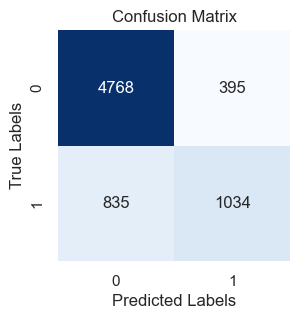

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      5163
           1       0.72      0.55      0.63      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.74      0.76      7032
weighted avg       0.82      0.83      0.82      7032



In [27]:
conf_matrix = confusion_matrix(y, ypred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_final.classes_, yticklabels=rf_final.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y, ypred))

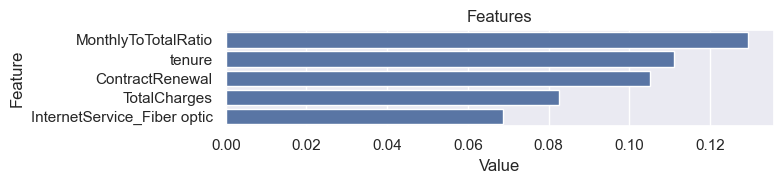

None


In [28]:
def plot_importance(model, features, num=5, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 2))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

print(plot_importance(rf_final, X))

In [29]:
dt_model = RandomForestClassifier(random_state=42)

dt_params = {"criterion":['gini','entropy'],
             'max_depth':[3,4,5,6,7,8],
            'min_samples_split':[2,3,4],
            'min_samples_leaf':[1,2,3,4],
            'random_state':[0,42]}

dt_best_grid = GridSearchCV(dt_model, dt_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# GridSearchCV çıktılarına bakarak en iyi parametreleri kontrol et
print("Best Parameters:", dt_best_grid.best_params_)

# En iyi parametrelerle modeli oluştur ve eğit
dt_final = dt_model.set_params(**dt_best_grid.best_params_).fit(X, y)

# cross_validate ile performansı değerlendir
cv_results = cross_validate(dt_final, X, y, cv=10, scoring=["accuracy", "precision" ,"f1", "recall"])
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("F1:", cv_results['test_f1'].mean())
print("Recall:", cv_results['test_recall'].mean())

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}
Accuracy: 0.8034656666235612
Precision: 0.6756379662119508
F1: 0.5755412556749518
Recall: 0.5018544074521304


In [30]:
ypred = dt_final.predict(X)

# If you also want the probability estimates for each class, you can use:
ypred_proba = dt_final.predict_proba(X)

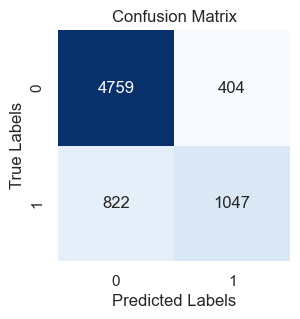

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      5163
           1       0.72      0.56      0.63      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.74      0.76      7032
weighted avg       0.82      0.83      0.82      7032



In [31]:
conf_matrix = confusion_matrix(y, ypred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=dt_final.classes_, yticklabels=rf_final.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y, ypred))

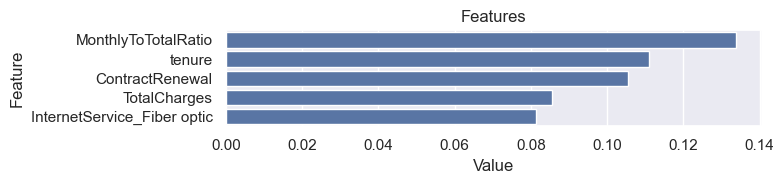

None


In [32]:
def plot_importance(model, features, num=5, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 2))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

print(plot_importance(dt_final, X))